<a href="https://colab.research.google.com/github/ofparrapo/CienciaDeDatos/blob/main/RegresionLogistica_Fernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
--- Análisis Exploratorio de Datos para Titanic ---
Resumen estadístico:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            P

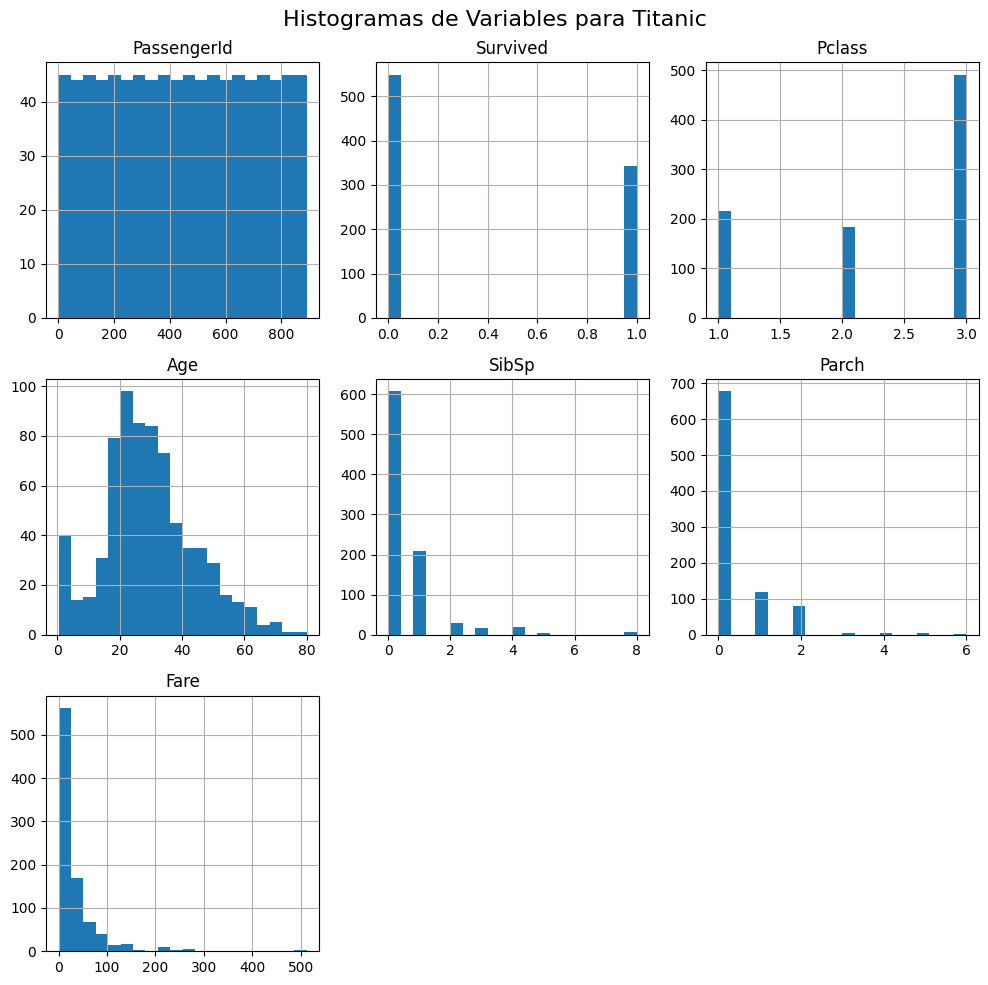


--- Preprocesamiento de Datos para Titanic ---

--- Selección de Características para Titanic ---

--- División en Train y Test para Titanic ---

--- Entrenamiento del Modelo para Titanic ---

--- Evaluación del Modelo para Titanic ---
Accuracy: 0.782
Precision: 0.761
Recall: 0.689
F1-score: 0.723
AUC: 0.768

--- Gráficas de Resultados para Titanic ---


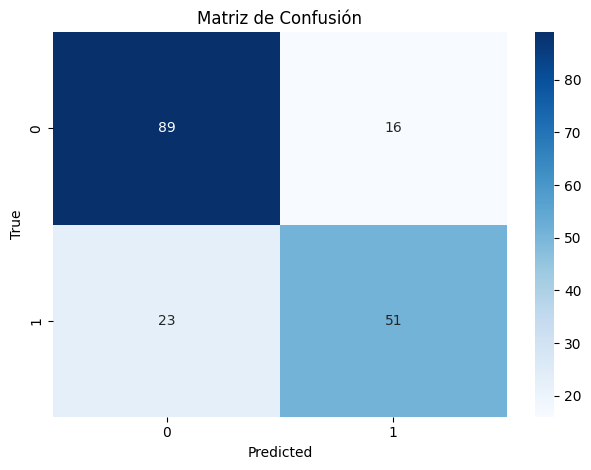

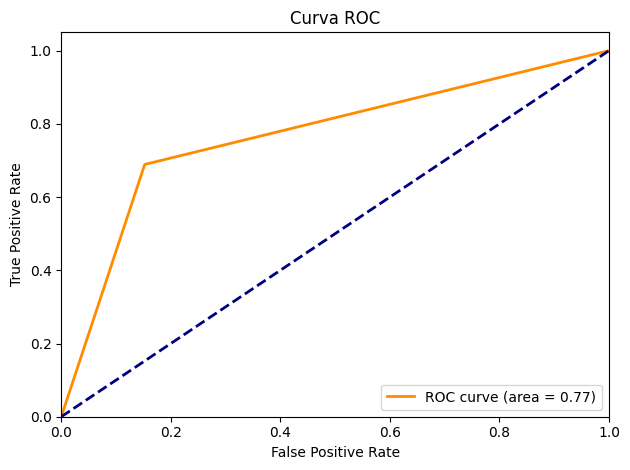

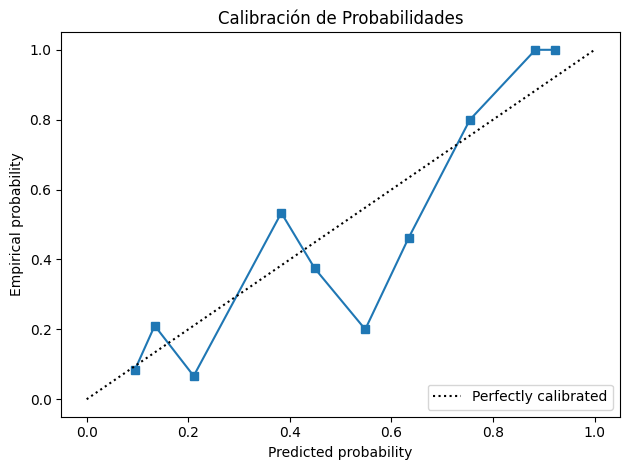


--- Interpretación y Análisis de Resultados para Titanic ---
Las variables más importantes son:
x1    1.261533
x0    0.707104
x6    0.170759
dtype: float64


In [1]:
# Montar Google Drive y configurar el directorio
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DATASET/")

# Instalar las dependencias necesarias
!pip install --upgrade scikit-learn

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Cargar los datos de Titanic
data = pd.read_csv('Titanic-Dataset.csv')

# 1. Análisis Exploratorio de Datos
print("--- Análisis Exploratorio de Datos para Titanic ---")
print("Resumen estadístico:")
print(data.describe())

# Calcular la matriz de correlación solo para las columnas numéricas
numeric_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print("\nMatriz de correlación:")
print(data[numeric_columns].corr())

data.hist(bins=20, figsize=(10,10))
plt.suptitle('Histogramas de Variables para Titanic', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Preprocesamiento de Datos
print("\n--- Preprocesamiento de Datos para Titanic ---")
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

X = data.drop('Survived', axis=1)
y = data['Survived']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Selección de Características
print("\n--- Selección de Características para Titanic ---")
selector = SelectKBest(f_classif, k=5)
X = selector.fit_transform(X, y)

# 4. División en Train y Test
print("\n--- División en Train y Test para Titanic ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del Modelo
print("\n--- Entrenamiento del Modelo para Titanic ---")
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

# 6. Evaluación del Modelo
print("\n--- Evaluación del Modelo para Titanic ---")
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_pred):.3f}")

# 7. Gráficas de Resultados
print("\n--- Gráficas de Resultados para Titanic ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

prob_pos = clf.predict_proba(X_test)[:, 1]

n_bins = 10
bin_edges = np.linspace(0., 1., n_bins + 1)
bin_indices = np.digitize(prob_pos, bin_edges) - 1

bin_sums = np.bincount(bin_indices, weights=prob_pos, minlength=len(bin_edges))
bin_true = np.bincount(bin_indices, weights=y_test, minlength=len(bin_edges))
bin_total = np.bincount(bin_indices, minlength=len(bin_edges))

nonzero = bin_total != 0
prob_true = bin_true[nonzero] / bin_total[nonzero]
prob_pred = bin_sums[nonzero] / bin_total[nonzero]

plt.figure()
plt.plot(prob_pred, prob_true, "s-")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Empirical probability")
plt.ylim([-0.05, 1.05])
plt.title('Calibración de Probabilidades')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Interpretación y Análisis de Resultados
print("\n--- Interpretación y Análisis de Resultados para Titanic ---")
print("Las variables más importantes son:")
print(pd.Series(clf.coef_[0], index=selector.get_feature_names_out()).abs().nlargest(3))